# GRIP @The Sparks Foundation

# SAVITA BALABHADRAPATRUNI

**Task No - 2. PREDICTION USING UNSUPERVISED ML.**

**This task requires us to predict the optimuum number of clusters and represent it visually**

In [1]:
#data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#datasets from sklearn
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
#Filter all the warnings

import warnings

#Ignoring the warning messages

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment=None

In [3]:
#Load the Iris Dataset
iris_data=datasets.load_iris()

In [4]:
#Print and view the features and labels

print("Features: ", iris_data.feature_names)
print("Labels: ", iris_data.target_names)

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels:  ['setosa' 'versicolor' 'virginica']


In [5]:
#extracting features and labels || loading dataset
features=pd.DataFrame(iris_data.data)
features.columns=iris_data.feature_names

labels=pd.DataFrame(iris_data.target)
labels.columns=['class']

df=pd.concat([features,labels],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.shape

#The shape of the dataframe 

(150, 5)

In [8]:
#Datatypes of all columns

df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                  int32
dtype: object

In [9]:
#find out missing values in the data frame

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

So there are no null values to be filled/changed. 

In [10]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


To get a better insight; visualization of data is important.

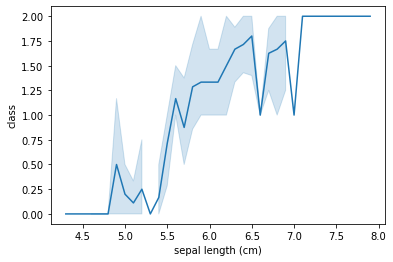

In [11]:
#Line plot
sns.lineplot(data=df, x="sepal length (cm)", y="class")

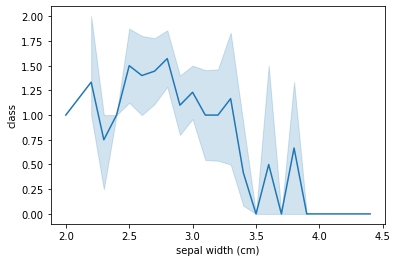

In [12]:
sns.lineplot(data=df, x="sepal width (cm)", y="class")

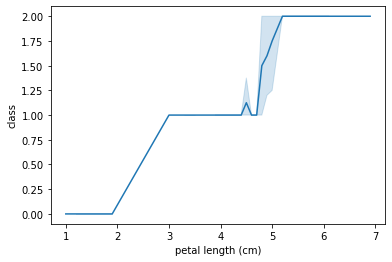

In [13]:
sns.lineplot(data=df, x="petal length (cm)", y="class")

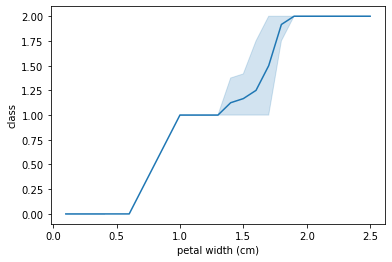

In [14]:
sns.lineplot(data=df, x="petal width (cm)", y="class")

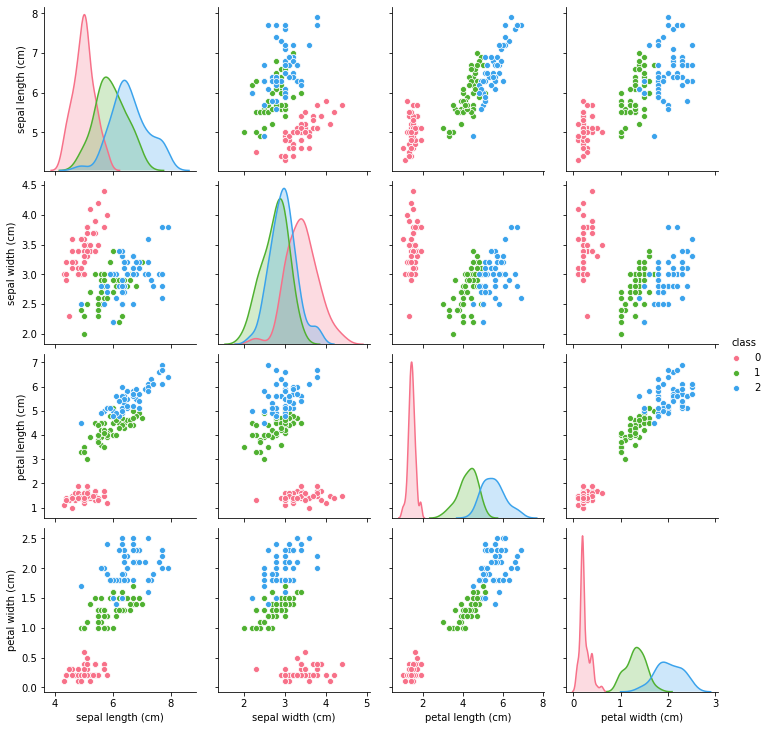

In [16]:
#Pairplot

sns.pairplot(df, hue = 'class',palette='husl')
plt.show()

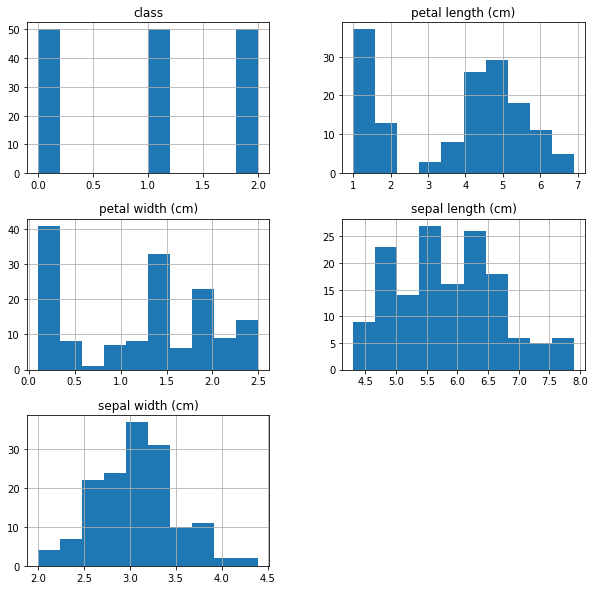

In [17]:
#HISTOGRAM

df.hist(figsize=(10,10))
plt.show()

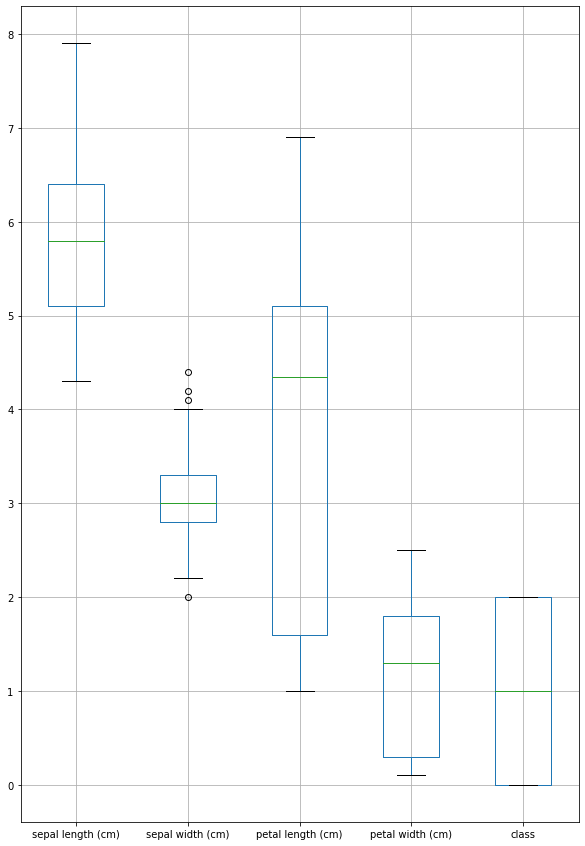

In [18]:
#BOXPLOT

df.boxplot(figsize=(10,15))
plt.show()

In [19]:
#Correlation Analysis

correlation = df.corr()
correlation

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


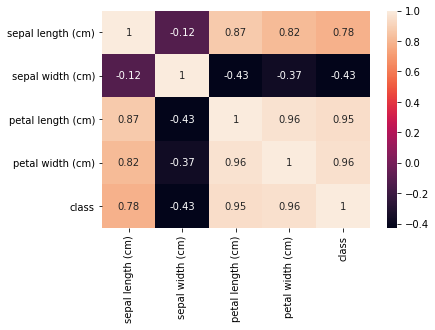

In [20]:
sns.heatmap(correlation, annot = True)

From the above correlation; we find that petal length has very high correlation with petal width and 
very low correlation with sepal width.

Similarly; sepal width has very low correlation with sepal length and petal width. 


Hence we consider dropping off the columns 'Petal length' and 'Sepal Width'

In [21]:
df=df.drop(['petal length (cm)'],axis=1)   # remove 'petal length (cm)' column from df dataset
df=df.drop(['sepal width (cm)'],axis=1)   # remove 'sepal width (cm)' column from df dataset

In [22]:
#viewing the correlation after data cleaning

correlation = df.corr()
correlation

,sepal length (cm),petal width (cm),class
sepal length (cm),1.000000,0.817941,0.782561
petal width (cm),0.817941,1.000000,0.956547
class,0.782561,0.956547,1.000000


# Determine the value of k -> using Elbow Method

In [23]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

In [24]:
inertia_list

[288.7382666666666,
 89.49827546296297,
 44.26663769507804,
 31.897046753246755,
 22.270129304029304,
 18.359612995337994,
 14.496838636363638,
 12.518882575757576,
 11.106059566250742,
 9.46061496314853,
 8.027663982756373,
 7.251474588816978,
 6.351801587301585,
 5.650845245937637,
 5.358544566544566,
 4.841238418014734,
 4.491437487029877,
 4.057870670995671,
 3.741072871572871,
 3.6643266309713667]

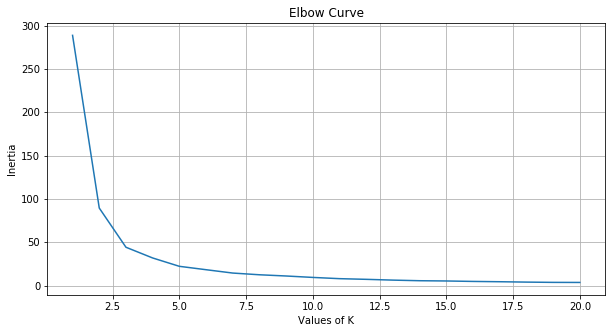

In [25]:
#Plotting the Elbow Curve

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

**From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 3.**

# Implementing K-means using scikit learn

In [26]:
dfx = df[['sepal length (cm)','petal width (cm)']]
dfy = df['class']

In [27]:
#Here, we are taking the value of k as 3 as found above

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
labels = kmeans.fit_predict(dfx)

In [28]:
#printing the centroids of each cluster

centroids = kmeans.cluster_centers_
centroids

array([[6.84318182, 1.98409091],
       [5.00555556, 0.3037037 ],
       [5.86730769, 1.46538462]])

In [29]:
#Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are
kmeans.inertia_

32.726526159026164

In [30]:
x=dfx.values
y=dfy.values

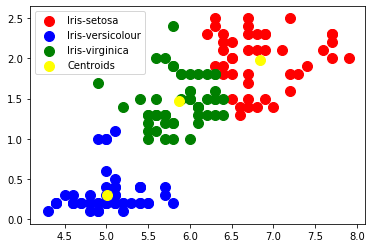

In [31]:
# Visualising the 3 clusters
plt.scatter(x[labels == 0, 0], x[labels == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[labels == 1, 0], x[labels == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[labels == 2, 0], x[labels == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**THANK YOU!**